## Study of a Sample

In this section we will study a sample of 1% from the dataset and look at the Z-scores of the features

In [1]:
library(MASS)

In [2]:
data(Boston)

In [3]:
dim(Boston)

[1] 506  14

In [4]:
Boston$medv <- NULL

In [5]:
install.packages('moments')

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [6]:
library(moments)

In [7]:
library(dplyr, warn.conflicts = FALSE)

In [8]:
sample_1_pct <- sample_n(Boston, 5)

In [9]:
stats = data.frame(feature=colnames(Boston))
stats['mean_dataset'] = sapply(Boston, mean)
stats['mean_sample'] = sapply(sample_1_pct, mean)
stats['sd_dataset'] = sapply(Boston, sd)
stats['sd_sample'] = sapply(sample_1_pct, sd)
stats['skewness_dataset'] = sapply(Boston, skewness)
stats['skewness_sample'] = sapply(sample_1_pct, skewness)

In [10]:
zscore_sample <- (colMeans(sample_1_pct) - stats$mean_dataset)/stats$sd_dataset

In [11]:
stats['zscore_sample'] <- zscore_sample

In [12]:
stats

feature,mean_dataset,mean_sample,sd_dataset,sd_sample,skewness_dataset,skewness_sample,zscore_sample
crim,3.61352356,2.119558,8.6015451,4.00751875,5.2076524,1.4443328,-0.173685720
zn,11.36363636,7.500000,23.3224530,11.18033989,2.2190631,0.8437500,-0.165661664
indus,11.13677866,11.120000,6.8603529,7.16252400,0.2941463,0.3479261,-0.002445742
chas,0.06916996,0.000000,0.2539940,0.00000000,3.3957993,NaN,-0.272329068
nox,0.55469506,0.540200,0.1158777,0.08121392,0.7271442,-0.2551071,-0.125089317
rm,6.28463439,6.027800,0.7026171,0.16094316,0.4024147,0.1198195,-0.365539597
age,68.57490119,70.840000,28.1488614,25.58208357,-0.5971856,0.1550383,0.080468577
dis,3.79504269,3.957460,2.1057101,2.02456571,1.0087788,-0.5416180,0.077131847
rad,9.54940711,8.600000,8.7072594,8.61974478,1.0018335,1.4903814,-0.109036273
tax,408.23715415,377.000000,168.5371161,174.05315280,0.6679683,1.0284448,-0.185342878


In [13]:
zscores <- (t(sample_1_pct)-stats$mean_dataset)/stats$sd_dataset

In [14]:
library(reshape2)
library(ggplot2)

Using feature as id variables


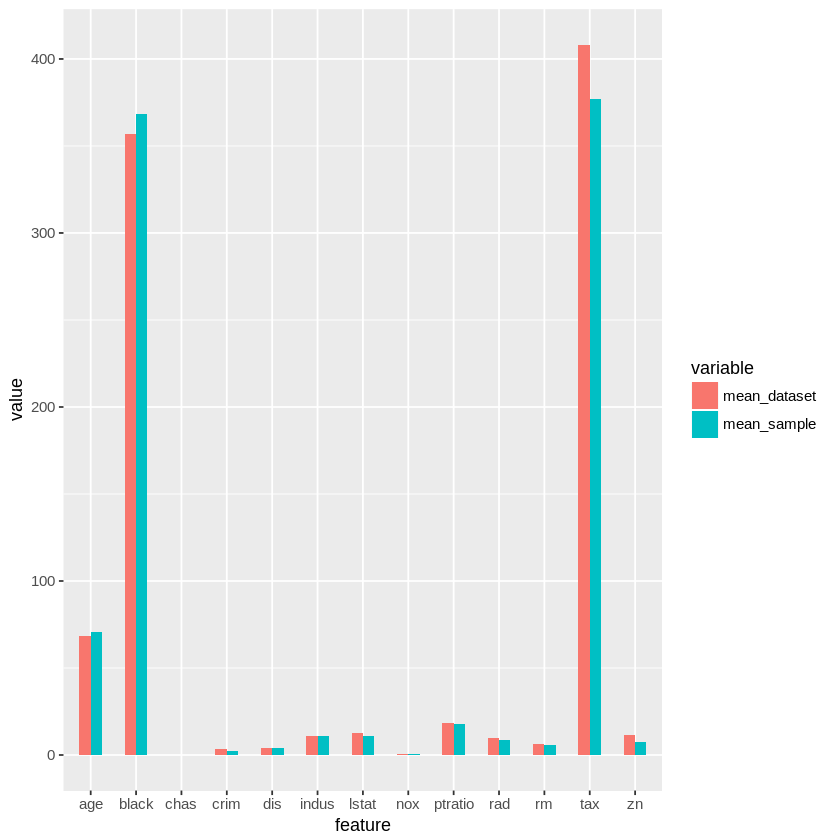

In [15]:
ggplot(melt(stats[,c('feature','mean_dataset','mean_sample')]), aes(x = feature, y = value, fill = variable)) + 
    geom_bar(stat = "identity", width=0.5, position = "dodge")

Using feature as id variables


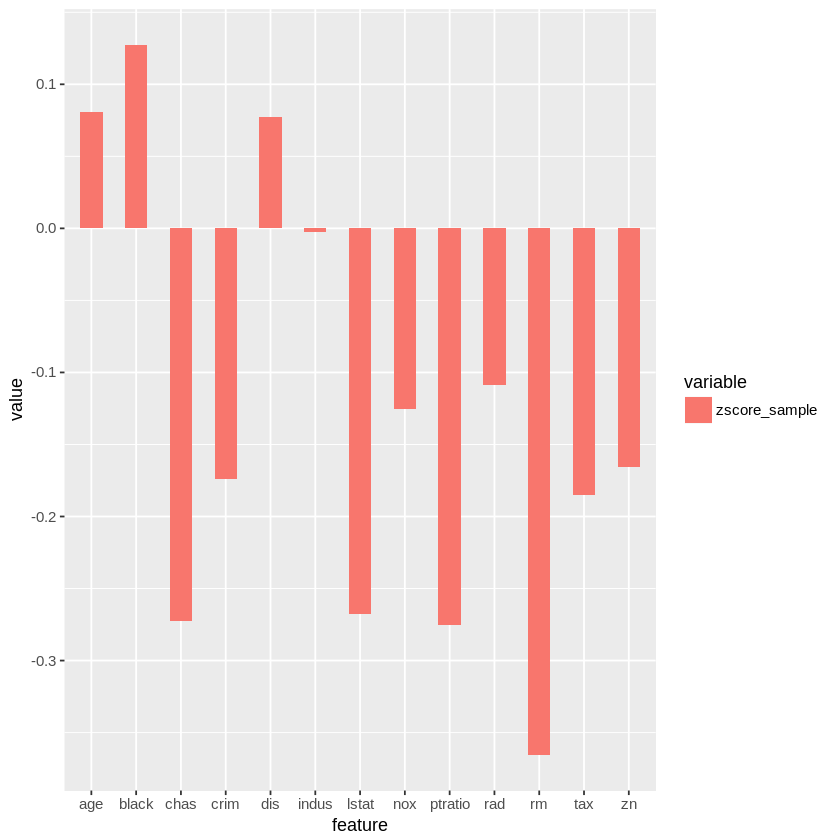

In [16]:
ggplot(melt(stats[,c('feature','zscore_sample')]), aes(x = feature, y = value, fill = variable)) + 
    geom_bar(stat = "identity", width=0.5, position = "dodge")

In [17]:
install.packages('gplots')
library(gplots)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done

Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess



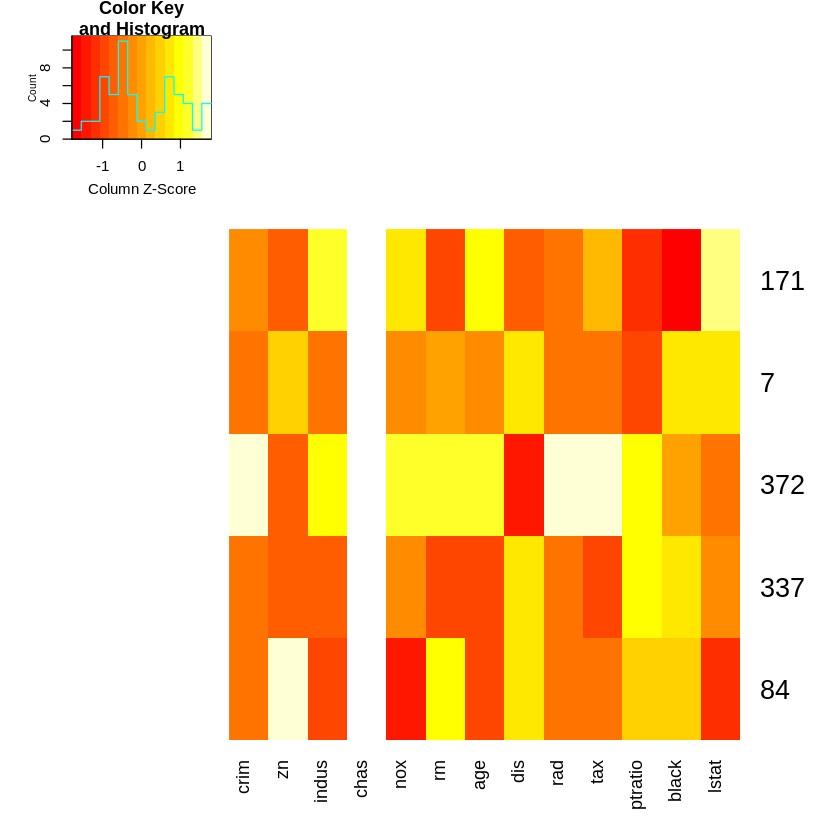

In [18]:
heatmap.2(as.matrix(sample_1_pct),scale='column',trace='none',Rowv=FALSE,Colv=FALSE,dendrogram='none')

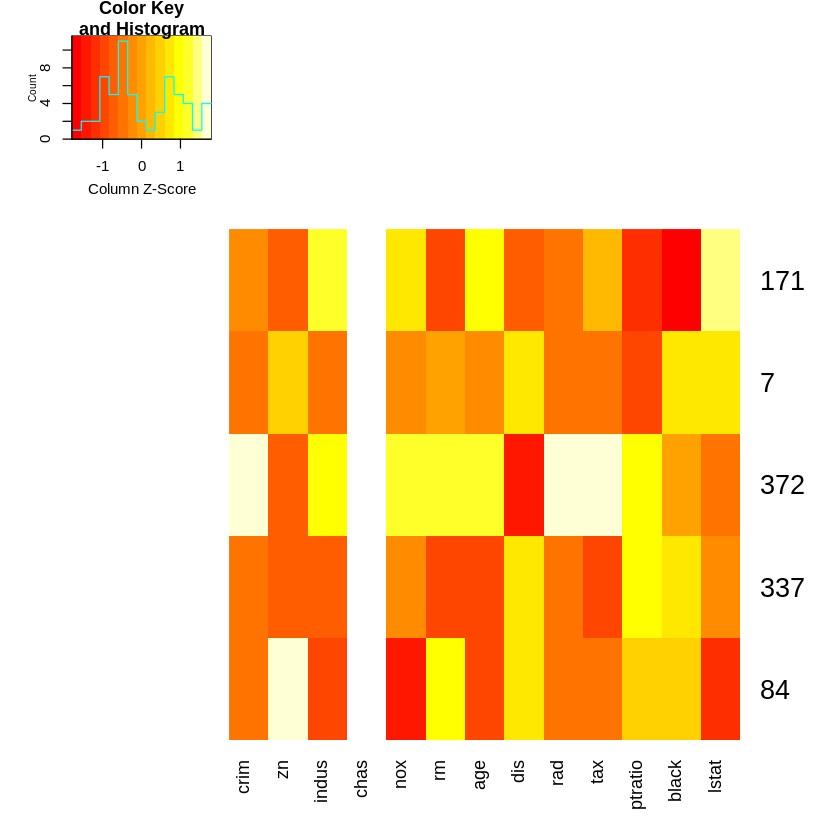

In [19]:
heatmap.2(as.matrix(t(zscores)),scale='column',trace='none',Rowv=FALSE,Colv=FALSE,dendrogram='none')

### A Note About Sampling

We use sampling as a technique to reduce the size, and the number of the data points, when working with large dataset. It is important to take an appropriate sample size in order to have a good representation of the data. The method used has to be selected based on the task at hand and the circumstances around the data. Once we select a sampling method, and develop a model , we may realize that the model is not suited, and we may have to restart by using a different sampling method.

It is important to note that even the entire dataset is a sample of the real world, and has its own uncertainty. So an appropriate sampling technique can represent the whole dataset properly, and accomplish the task of developing a good data model without the need to use the entire dataset.

### Comparing Values Across the Categories

It is difficult to work with features that have varying ranges on different scales, and as we can see from our plots and charts the means for these features can be anywhere from 0.06916996 to 408.23715415. In order to be able to work with the data and analyze it further, we will use **Feature scaling**, to standardize the range of the features data.